# Acquire and organize Rent Data

In [11]:
import pandas as pd

In [12]:
#load directly from Zillow's public csv
url = "https://files.zillowstatic.com/research/public_csvs/zori/Metro_zori_uc_sfrcondomfr_sm_month.csv?t=1759893405"
df = pd.read_csv(url)

#quick inspection
df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,...,2024-11-30,2024-12-31,2025-01-31,2025-02-28,2025-03-31,2025-04-30,2025-05-31,2025-06-30,2025-07-31,2025-08-31
0,102001,0,United States,country,NaN,1194.531316,1201.046678,1209.977465,1219.121984,1228.210777,...,1958.792449,1957.650228,1962.835364,1970.998277,1982.771998,1992.064166,1999.318594,2004.282155,2006.596008,2007.274989
1,394913,1,"New York, NY",msa,NY,2351.780210,2367.437617,2387.395252,2407.639477,2423.298975,...,3382.720019,3378.051483,3388.342411,3407.729866,3438.834132,3470.845447,3500.222294,3533.544497,3564.752561,3586.664319
2,753899,2,"Los Angeles, CA",msa,CA,1787.178666,1798.766575,1814.303222,1829.251166,1844.157247,...,2899.602206,2894.018381,2915.550897,2937.835454,2961.810117,2960.318693,2964.186810,2968.745424,2971.566852,2972.770031
3,394463,3,"Chicago, IL",msa,IL,1392.310287,1399.360552,1409.318550,1418.774179,1428.961726,...,2041.268639,2046.162666,2054.015571,2070.492618,2088.966580,2110.838179,2130.799394,2149.924676,2161.314032,2165.433101
4,394514,4,"Dallas, TX",msa,TX,1084.461666,1089.321390,1097.092505,1108.512234,1118.155028,...,1709.813461,1705.309321,1703.769193,1709.865962,1719.074034,1728.984872,1731.425466,1732.477546,1729.376281,1726.004400


In [13]:
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Columns: 133 entries, RegionID to 2025-08-31
dtypes: float64(128), int64(2), object(3)
memory usage: 725.4+ KB


Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       '2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30', '2015-05-31',
       ...
       '2024-11-30', '2024-12-31', '2025-01-31', '2025-02-28', '2025-03-31',
       '2025-04-30', '2025-05-31', '2025-06-30', '2025-07-31', '2025-08-31'],
      dtype='object', length=133)

In [14]:
texas_cities = ['Austin, TX', 'Dallas, TX', 'Houston, TX', 'San Antonio, TX']
df_tx = df[df['RegionName'].isin(texas_cities)]

In [16]:
df['RegionName'].head(20).tolist()

['United States',
 'New York, NY',
 'Los Angeles, CA',
 'Chicago, IL',
 'Dallas, TX',
 'Houston, TX',
 'Washington, DC',
 'Philadelphia, PA',
 'Miami, FL',
 'Atlanta, GA',
 'Boston, MA',
 'Phoenix, AZ',
 'San Francisco, CA',
 'Riverside, CA',
 'Detroit, MI',
 'Seattle, WA',
 'Minneapolis, MN',
 'San Diego, CA',
 'Tampa, FL',
 'Denver, CO']

In [17]:
texas_cities = [
    'Austin-Round Rock, TX',
    'Dallas-Fort Worth-Arlington, TX',
    'Houston-The Woodlands-Sugar Land, TX',
    'San Antonio-New Braunfels, TX'
]

df_tx = df[df['RegionName'].isin(texas_cities)]

In [18]:
df_tx[['RegionName']].value_counts()

Series([], Name: count, dtype: int64)

In [19]:
df[df['StateName'] == 'TX']['RegionName'].unique()

array(['Dallas, TX', 'Houston, TX', 'San Antonio, TX', 'Austin, TX',
       'McAllen, TX', 'El Paso, TX', 'Killeen, TX', 'Corpus Christi, TX',
       'Brownsville, TX', 'Beaumont, TX', 'Lubbock, TX', 'Longview, TX',
       'Waco, TX', 'Amarillo, TX', 'Laredo, TX', 'College Station, TX',
       'Tyler, TX', 'Abilene, TX', 'Midland, TX', 'Odessa, TX',
       'Wichita Falls, TX', 'Texarkana, TX', 'Sherman, TX',
       'San Angelo, TX', 'Victoria, TX', 'Lufkin, TX', 'Athens, TX',
       'Huntsville, TX', 'Nacogdoches, TX', 'Granbury, TX',
       'Palestine, TX', 'Eagle Pass, TX', 'Kerrville, TX',
       'Corsicana, TX', 'Jacksonville, TX', 'Paris, TX', 'Del Rio, TX',
       'Mount Pleasant, TX', 'Stephenville, TX', 'El Campo, TX',
       'Gainesville, TX', 'Brownwood, TX', 'Sulphur Springs, TX',
       'Bay City, TX', 'Brenham, TX', 'Bonham, TX', 'Big Spring, TX',
       'Kingsville, TX', 'Fredericksburg, TX', 'Rockport, TX',
       'Andrews, TX'], dtype=object)

In [20]:
texas_cities = ['Austin, TX', 'Dallas, TX', 'Houston, TX', 'San Antonio, TX']
df_tx = df[df['RegionName'].isin(texas_cities)]
df_tx[['RegionName']].value_counts()

RegionName     
Austin, TX         1
Dallas, TX         1
Houston, TX        1
San Antonio, TX    1
Name: count, dtype: int64

In [22]:
df_tx_melted['Date'] = pd.to_datetime(df_tx_melted['Date'], format='%Y-%m-%d', errors='coerce')

In [23]:
df_tx_melted.info()
df_tx_melted.head()

<class 'pandas.core.frame.DataFrame'>
Index: 512 entries, 12 to 523
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   RegionName  512 non-null    object        
 1   StateName   512 non-null    object        
 2   Date        512 non-null    datetime64[ns]
 3   ZORI        512 non-null    object        
dtypes: datetime64[ns](1), object(3)
memory usage: 20.0+ KB


,RegionName,StateName,Date,ZORI
12,"Dallas, TX",TX,2015-01-31,1084.461666
13,"Houston, TX",TX,2015-01-31,1223.643014
14,"San Antonio, TX",TX,2015-01-31,1043.172517
15,"Austin, TX",TX,2015-01-31,1178.808703
16,"Dallas, TX",TX,2015-02-28,1089.32139


# Plot Rent Trends for Major Texas Metros

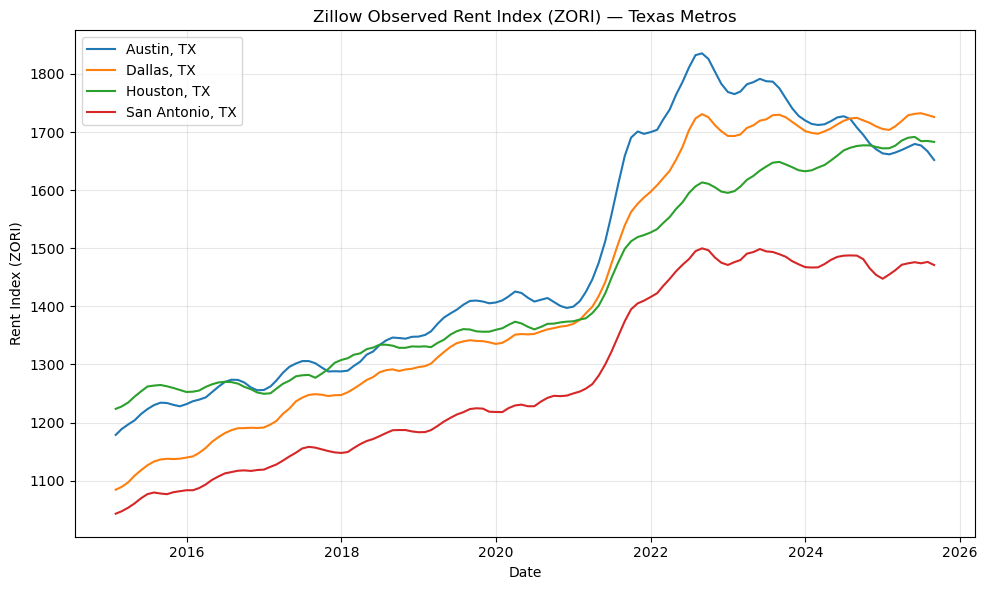

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
for city, data in df_tx_melted.groupby('RegionName'):
    plt.plot(data['Date'], data['ZORI'], label=city)

plt.title('Zillow Observed Rent Index (ZORI) — Texas Metros')
plt.xlabel('Date')
plt.ylabel('Rent Index (ZORI)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Calculate Year-Over-Year (YoY) Growth %

In [26]:
# Extract year from the datetime column
df_tx_melted['Year'] = df_tx_melted['Date'].dt.year

# Aggregate by year and city
df_yearly = (
    df_tx_melted
    .groupby(['RegionName', 'StateName', 'Year'], as_index=False)['ZORI']
    .mean()
)

df_yearly['YoY_%'] = (
    df_yearly
    .groupby('RegionName')['ZORI']
    .pct_change(periods=1) * 100
)

df_recent = df_yearly[df_yearly['Year'] >= 2018]

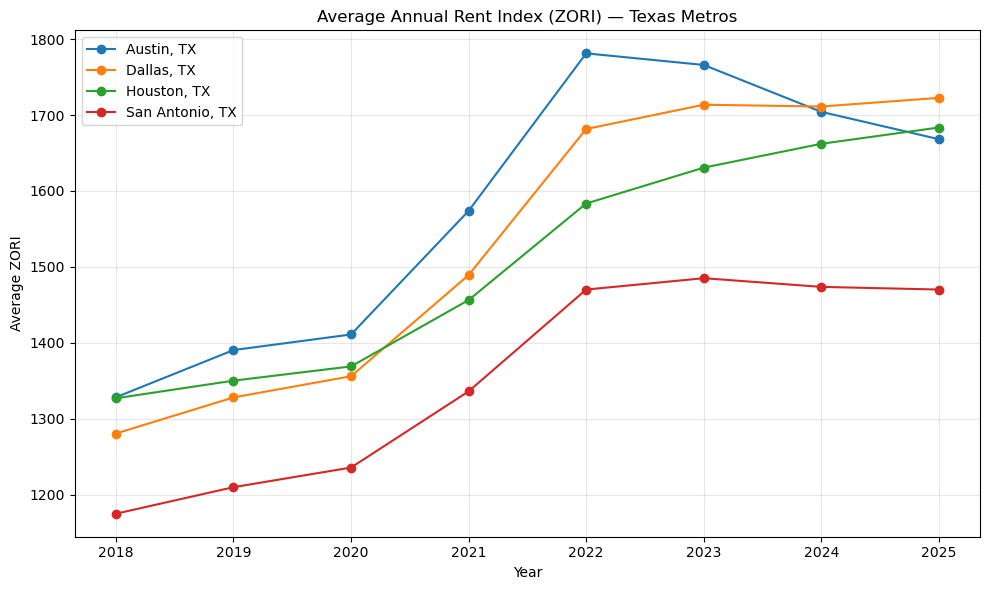

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
for city, data in df_recent.groupby('RegionName'):
    plt.plot(data['Year'], data['ZORI'], marker='o', label=city)

plt.title('Average Annual Rent Index (ZORI) — Texas Metros')
plt.xlabel('Year')
plt.ylabel('Average ZORI')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

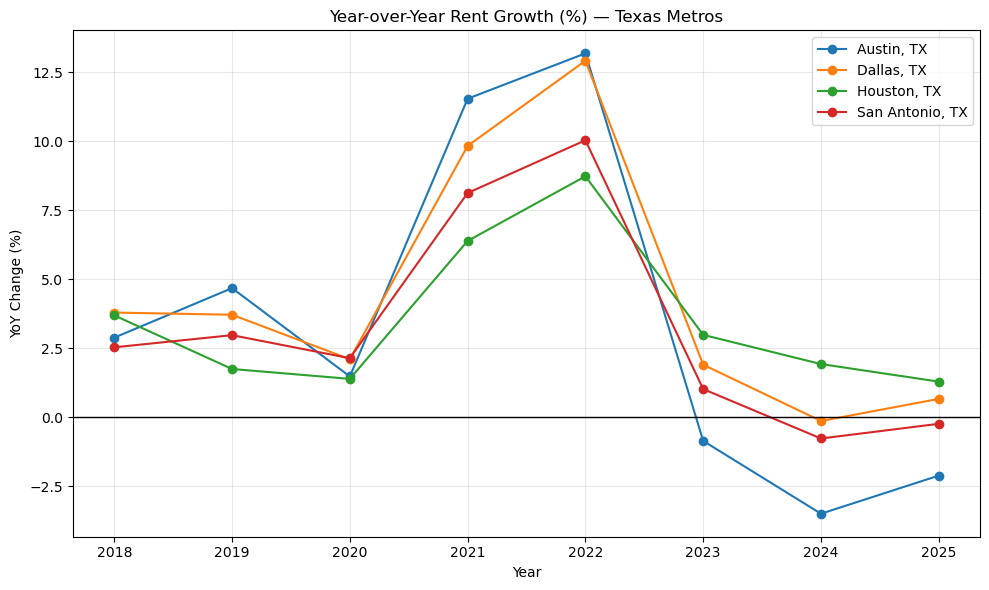

In [28]:
plt.figure(figsize=(10,6))
for city, data in df_recent.groupby('RegionName'):
    plt.plot(data['Year'], data['YoY_%'], marker='o', label=city)

plt.title('Year-over-Year Rent Growth (%) — Texas Metros')
plt.xlabel('Year')
plt.ylabel('YoY Change (%)')
plt.legend()
plt.axhline(0, color='black', linewidth=1)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Next Steps
- Refine visualizations (add annotations for 2020–2021 pandemic spike)
- Quantify pre- vs post-pandemic rent growth
- Fit a simple regression / trendline to project 2026–2028 trajectory
- Summarize insights in README → “Pandemic Impact and Recovery Patterns”